In [1]:
import pandas as pd
import yfinance as yf
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF


In [2]:
tickers=['SPY', 'TLT', 'RWR']
df= yf.download(tickers, start='2010-01-01', end='2022-12-30')

[*********************100%***********************]  3 of 3 completed


In [3]:
df

Adj Close                              Close              \
                  RWR         SPY         TLT        RWR         SPY   
Date                                                                   
2009-12-31  31.859335   86.979027   63.605614  49.209999  111.440002   
2010-01-04  31.716919   88.454170   63.549019  48.990002  113.330002   
2010-01-05  31.742800   88.688324   63.959446  49.029999  113.629997   
2010-01-06  31.723366   88.750786   63.103241  49.000000  113.709999   
2010-01-07  32.014725   89.125450   63.209362  49.450001  114.190002   
...               ...         ...         ...        ...         ...   
2022-12-22  86.699997  380.720001  103.159760  86.699997  380.720001   
2022-12-23  87.430000  382.910004  101.647392  87.430000  382.910004   
2022-12-27  87.410004  381.399994   99.637527  87.410004  381.399994   
2022-12-28  85.820000  376.660004   99.050491  85.820000  376.660004   
2022-12-29  87.650002  383.440002  100.174820  87.650002  383.440002   

                             High                                Low  \
                   TLT        RWR         SPY         TLT        RWR   
Date                                                                   
2009-12-31   89.889999  50.680000  112.800003   90.110001  49.200001   
2010-01-04   89.809998  50.000000  113.389999   90.099998  48.669998   
2010-01-05   90.389999  49.060001  113.680000   90.629997  48.340000   
2010-01-06   89.180000  49.360001  113.989998   90.260002  48.799999   
2010-01-07   89.330002  49.700001  114.330002   89.639999  48.439999   
...                ...        ...         ...         ...        ...   
2022-12-22  103.680000  86.699997  386.209991  104.120003  85.050003   
2022-12-23  102.160004  87.430000  383.059998  102.809998  86.080002   
2022-12-27  100.139999  87.650002  383.149994  101.070000  86.750000   
2022-12-28   99.550003  87.900002  383.390015  100.779999  85.690002   
2022-12-29  100.680000  87.910004  384.350006  100.989998  86.260002   

                                         Open                          Volume  \
                   SPY         TLT        RWR         SPY         TLT     RWR   
Date                                                                            
2009-12-31  111.389999   89.050003  50.330002  112.769997   89.760002  170800   
2010-01-04  111.510002   89.580002  49.709999  112.370003   89.839996  428300   
2010-01-05  112.849998   90.000000  49.040001  113.260002   90.050003  799300   
2010-01-06  113.430000   89.120003  49.020000  113.519997   90.169998  685400   
2010-01-07  113.180000   89.120003  48.950001  113.500000   89.220001  560200   
...                ...         ...        ...         ...         ...     ...   
2022-12-22  374.769989  103.379997  86.349998  383.049988  103.669998  271500   
2022-12-23  378.029999  102.019997  86.449997  379.649994  102.580002  111800   
2022-12-27  379.649994  100.010002  87.370003  382.790009  100.489998  102100   
2022-12-28  376.420013   99.349998  87.610001  381.329987  100.650002  148300   
2022-12-29  379.079987   99.790001  86.389999  379.630005   99.860001  187800   

                                 
                  SPY       TLT  
Date                             
2009-12-31   90637900   3242400  
2010-01-04  118944600   2829100  
2010-01-05  111579900   2841600  
2010-01-06  116074400   4099600  
2010-01-07  131091100   2793200  
...               ...       ...  
2022-12-22  100120900  11322500  
2022-12-23   59857300  15408900  
2022-12-27   51638200  26475700  
2022-12-28   70911500  17302900  
2022-12-29   66970900  16593000  

[3272 rows x 18 columns]

In [4]:
df.info

<bound method DataFrame.info of             Adj Close                              Close              \
                  RWR         SPY         TLT        RWR         SPY   
Date                                                                   
2009-12-31  31.859335   86.979027   63.605614  49.209999  111.440002   
2010-01-04  31.716919   88.454170   63.549019  48.990002  113.330002   
2010-01-05  31.742800   88.688324   63.959446  49.029999  113.629997   
2010-01-06  31.723366   88.750786   63.103241  49.000000  113.709999   
2010-01-07  32.014725   89.125450   63.209362  49.450001  114.190002   
...               ...         ...         ...        ...         ...   
2022-12-22  86.699997  380.720001  103.159760  86.699997  380.720001   
2022-12-23  87.430000  382.910004  101.647392  87.430000  382.910004   
2022-12-27  87.410004  381.399994   99.637527  87.410004  381.399994   
2022-12-28  85.820000  376.660004   99.050491  85.820000  376.660004   
2022-12-29  87.650002  383.44000

In [6]:
df.columns

MultiIndex([('Adj Close', 'RWR'),
            ('Adj Close', 'SPY'),
            ('Adj Close', 'TLT'),
            (    'Close', 'RWR'),
            (    'Close', 'SPY'),
            (    'Close', 'TLT'),
            (     'High', 'RWR'),
            (     'High', 'SPY'),
            (     'High', 'TLT'),
            (      'Low', 'RWR'),
            (      'Low', 'SPY'),
            (      'Low', 'TLT'),
            (     'Open', 'RWR'),
            (     'Open', 'SPY'),
            (     'Open', 'TLT'),
            (   'Volume', 'RWR'),
            (   'Volume', 'SPY'),
            (   'Volume', 'TLT')],
           )

In [7]:
df.shape

(3272, 18)

<AxesSubplot:xlabel='Date'>

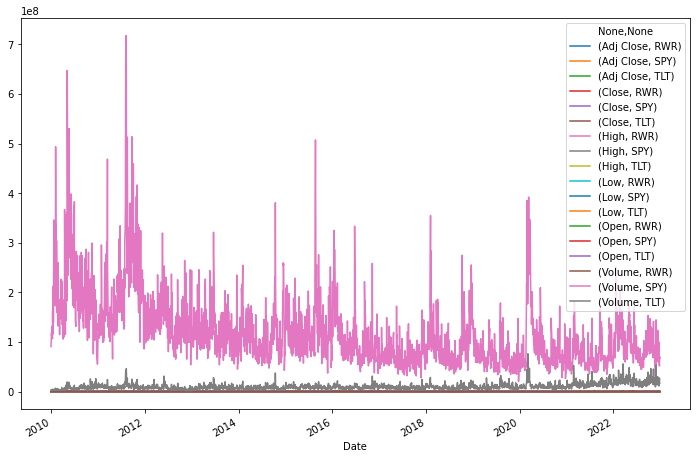

In [8]:
df.plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

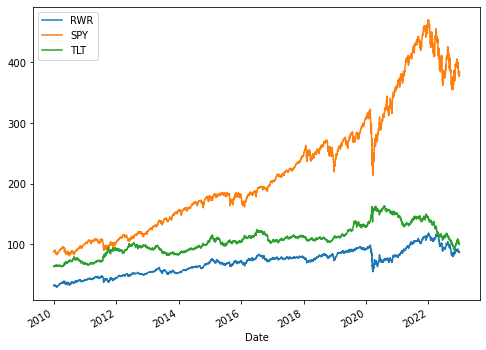

In [12]:
df['Adj Close'].plot(figsize=(8,6))

<AxesSubplot:xlabel='Date'>

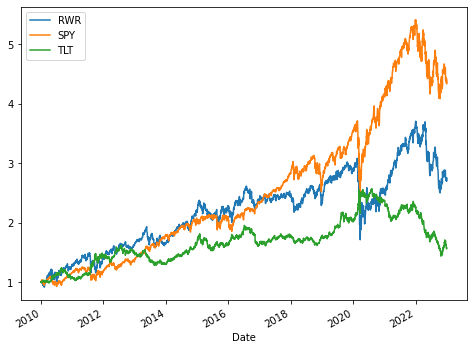

In [13]:
(df['Adj Close']/df['Adj Close'].iloc[0]).plot(figsize=(8,6))

In [15]:
daily_returns_df = np.log(df['Adj Close']/df['Adj Close'].shift(1)).dropna()


In [18]:
daily_returns_df.describe()

,RWR,SPY,TLT
count,3271.000000,3271.000000,3271.000000
mean,0.000309,0.000454,0.000139
std,0.013862,0.011132,0.009510
min,-0.202247,-0.115887,-0.069010
25%,-0.005634,-0.003737,-0.005485
50%,0.000930,0.000655,0.000563
75%,0.007123,0.005736,0.005753
max,0.090171,0.086731,0.072503


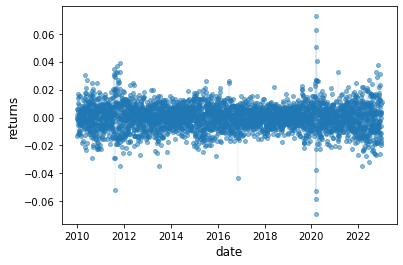

In [21]:
fig, ax = plt.subplots()

ax.plot(daily_returns_df['TLT'], linestyle='', marker='o', alpha=0.5, ms=4)
ax.vlines(daily_returns_df['TLT'].index, 0, daily_returns_df['TLT'].values, lw=0.1)
ax.set_ylabel('returns', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

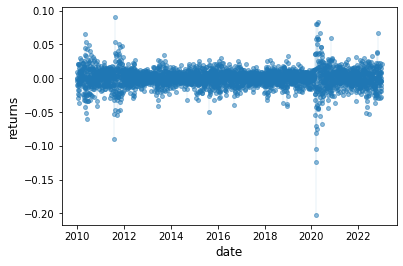

In [22]:
fig, ax = plt.subplots()

ax.plot(daily_returns_df['RWR'], linestyle='', marker='o', alpha=0.5, ms=4)
ax.vlines(daily_returns_df['RWR'].index, 0, daily_returns_df['RWR'].values, lw=0.1)
ax.set_ylabel('returns', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

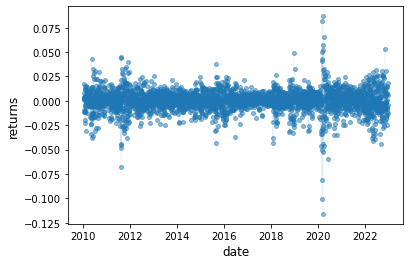

In [23]:
fig, ax = plt.subplots()

ax.plot(daily_returns_df['SPY'], linestyle='', marker='o', alpha=0.5, ms=4)
ax.vlines(daily_returns_df['SPY'].index, 0, daily_returns_df['SPY'].values, lw=0.1)
ax.set_ylabel('returns', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

<AxesSubplot:xlabel='TLT', ylabel='Count'>

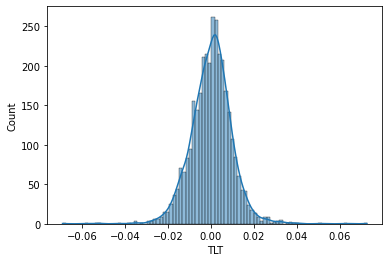

In [32]:
sb.histplot(daily_returns_df['TLT'] , kde=True)

In [27]:
import seaborn as sb

<AxesSubplot:xlabel='Date'>

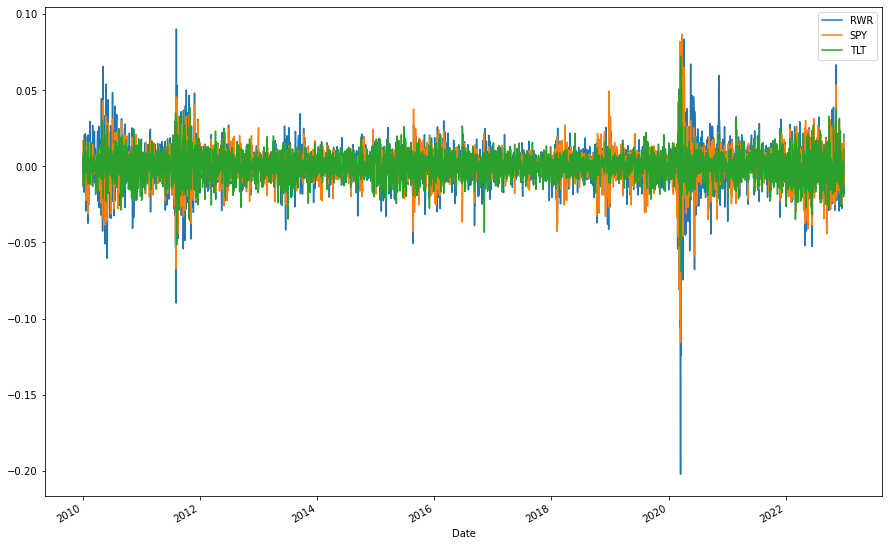

In [33]:
daily_returns_df.plot(figsize=(15,10))


<AxesSubplot:xlabel='Date'>

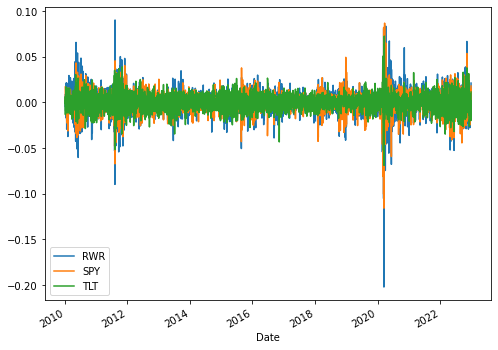

In [34]:
daily_returns_df.plot(figsize=(8,6))


In [35]:
daily_returns_df.describe()


,RWR,SPY,TLT
count,3271.000000,3271.000000,3271.000000
mean,0.000309,0.000454,0.000139
std,0.013862,0.011132,0.009510
min,-0.202247,-0.115887,-0.069010
25%,-0.005634,-0.003737,-0.005485
50%,0.000930,0.000655,0.000563
75%,0.007123,0.005736,0.005753
max,0.090171,0.086731,0.072503


In [36]:
0.013862*100

1.3861999999999999

In [38]:
0.011132*100

1.1132

In [39]:
0.009510*100

0.951

In [40]:
0.000309*100, 0.000454*100, 0.000139*100

(0.030899999999999997, 0.045399999999999996, 0.0139)

In [41]:
-0.202247*100, -0.115887*100 , -0.069010*100

(-20.224700000000002, -11.588700000000001, -6.901)

In [42]:
0.090171*100, 0.086731*100, 0.072503*100

(9.0171, 8.6731, 7.2503)

C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:17: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:19: MatplotlibDeprecationWarning: 
The is_last_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_col() instead.
  if ax.is_last_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:21: MatplotlibDeprecationWarning: 
The is_first_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_row() instead.
  if ax.is_first_row():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:23: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and wil

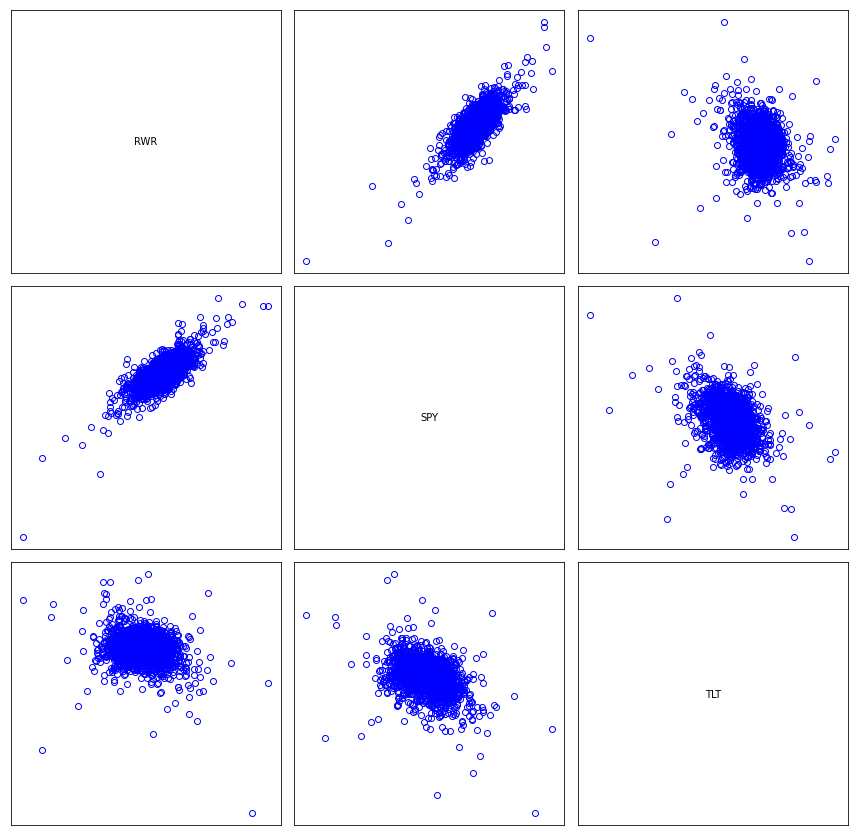

In [47]:
fig = scatterplot_matrix(daily_returns_df, list(daily_returns_df.columns), linestyle='none', marker='o', color='blue', mfc='none')


In [44]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid.""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(15,15))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data.iloc[:,x], data.iloc[:,y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    # for i, j in zip(range(numdata), itertools.cycle((-1, 0))):
    #     print(i, j)
    #     axes[j,i].xaxis.set_visible(True)
    #     axes[i,j].yaxis.set_visible(True)

    return fig   

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_9884/3763039743.py, line 42)

In [45]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(15,15))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data.iloc[:,x], data.iloc[:,y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    # for i, j in zip(range(numdata), itertools.cycle((-1, 0))):
    #     print(i, j)
    #     axes[j,i].xaxis.set_visible(True)
    #     axes[i,j].yaxis.set_visible(True)

    return fig   

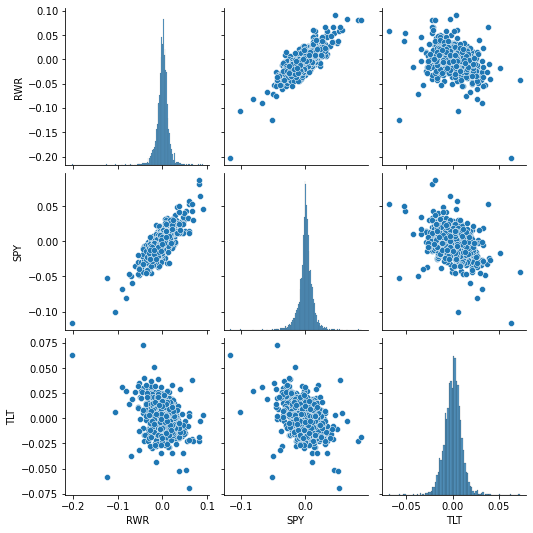

In [48]:
sb.pairplot(daily_returns_df)

In [49]:
mvnorm = st.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], 
                                                     [0.5, 1.]])
x = mvnorm.rvs(10000)

In [50]:
x

array([[ 1.11984397,  0.83909577],
       [ 0.43747305,  0.14528755],
       [-1.25144334,  0.62227997],
       ...,
       [ 1.69102028,  0.56156987],
       [-1.86708516, -0.99669633],
       [ 2.08680348,  0.85564117]])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'stat_func'
  cset = contour_func(


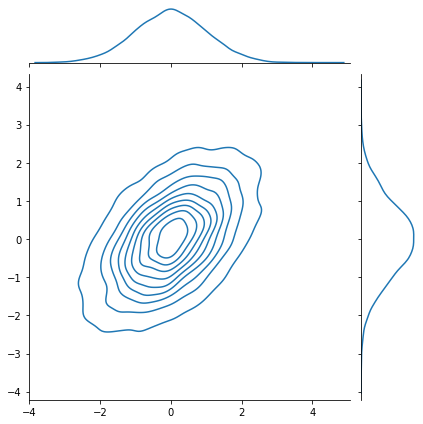

In [51]:
sb.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


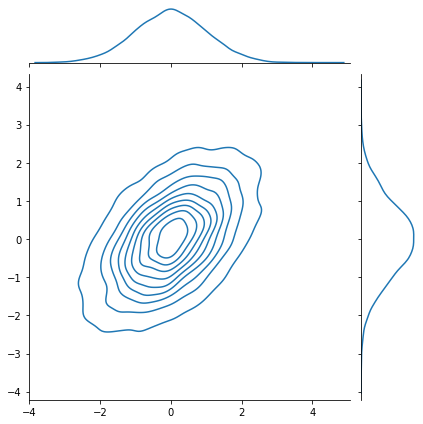

In [52]:
sb.jointplot(x[:, 0], x[:, 1], kind='kde')


In [53]:
x[:, 0]

array([ 1.11984397,  0.43747305, -1.25144334, ...,  1.69102028,
       -1.86708516,  2.08680348])

In [54]:
x

array([[ 1.11984397,  0.83909577],
       [ 0.43747305,  0.14528755],
       [-1.25144334,  0.62227997],
       ...,
       [ 1.69102028,  0.56156987],
       [-1.86708516, -0.99669633],
       [ 2.08680348,  0.85564117]])

In [55]:
x[:, 1]

array([ 0.83909577,  0.14528755,  0.62227997, ...,  0.56156987,
       -0.99669633,  0.85564117])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


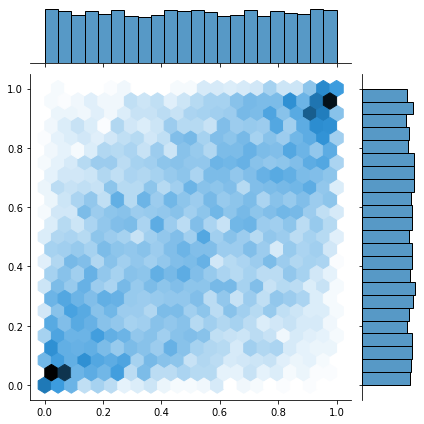

In [56]:
x_unif = st.norm.cdf(x)
sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex')

In [57]:
x_unif = st.norm.cdf(x)


In [58]:
x_unif

array([[0.86860987, 0.79929222],
       [0.66911584, 0.55775808],
       [0.10538639, 0.73312111],
       ...,
       [0.95458354, 0.71279544],
       [0.03094485, 0.15945597],
       [0.98154705, 0.80390186]])

In [60]:
x_unif.max()

0.9999947258320862

In [61]:
x_unif.min()

0.00017457251251376017

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

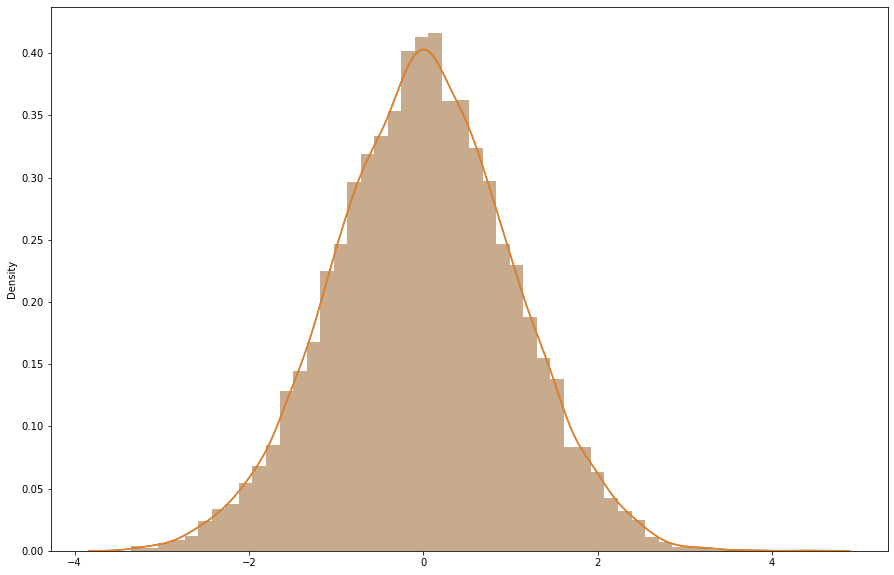

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(st.norm.ppf(x_unif[:,0]), ax=ax)
sb.distplot(x[:, 0], ax=ax)

In [63]:
st.norm.ppf(x_unif[:,0])

array([ 1.11984397,  0.43747305, -1.25144334, ...,  1.69102028,
       -1.86708516,  2.08680348])

In [64]:
sns.distplot(x[:, 0], ax=ax)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [65]:
x_unif[:,0]

array([0.86860987, 0.66911584, 0.10538639, ..., 0.95458354, 0.03094485,
       0.98154705])

In [66]:
import copulas

In [67]:
import copulas.multivariate

In [68]:
import copulae

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [73]:
from copulas.multivariate import GaussianMultivariate
copula = GaussianMultivariate()
copula.fit(x)

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5565: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


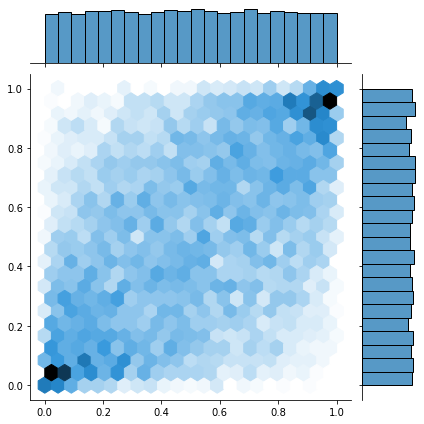

In [78]:
x1 = copula.univariates[0].cdf(x[:,0])
x2 = copula.univariates[1].cdf(x[:,1])
sb.jointplot(x1, x2, kind='hex')

In [75]:
x1

array([0.86138533, 0.666239  , 0.11128507, ..., 0.94956525, 0.03573531,
       0.97898188])

In [76]:
x[:,0]

array([ 1.11984397,  0.43747305, -1.25144334, ...,  1.69102028,
       -1.86708516,  2.08680348])

In [77]:
copula.univariates[0]

Univariate

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

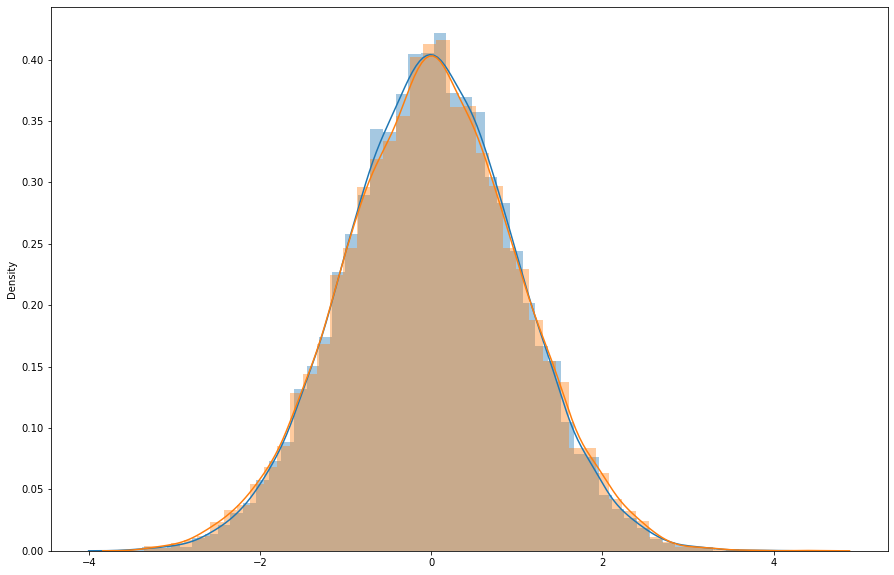

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(st.norm.ppf(x1), ax=ax)
sb.distplot(x[:, 0], ax=ax)

In [80]:
copula = GaussianMultivariate()
copula.fit(daily_returns_df)


C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  a = (self.min - loc) / scale
C:\Users\jahan 

In [81]:
copula.fit(daily_returns_df)

AttributeError: 'NoneType' object has no attribute 'plot'

In [82]:
marginal_cdfs = {}
for i, j in enumerate(daily_returns_df.columns):
    marginal = copula.univariates[i].cdf(daily_returns_df.iloc[:,i])
    marginal_cdfs[j] = marginal
marginal_cdfs_df = pd.DataFrame.from_dict(marginal_cdfs)
marginal_cdfs_df

,RWR,SPY,TLT
0,0.296912,0.949665,0.437869
1,0.497407,0.597899,0.769537
2,0.438650,0.488303,0.072717
3,0.801746,0.678590,0.558799
4,0.173893,0.634056,0.457908
...,...,...,...
3266,0.304013,0.054495,0.469573
3267,0.780250,0.745485,0.056747
3268,0.454272,0.253267,0.019482
3269,0.066220,0.069574,0.240218


In [83]:
daily_returns_df.columns

Index(['RWR', 'SPY', 'TLT'], dtype='object')

In [84]:
daily_returns_df.iloc[:,i]

Date
2010-01-04   -0.000890
2010-01-05    0.006438
2010-01-06   -0.013477
2010-01-07    0.001680
2010-01-08   -0.000447
                ...   
2022-12-22   -0.000193
2022-12-23   -0.014769
2022-12-27   -0.019971
2022-12-28   -0.005909
2022-12-29    0.011287
Name: TLT, Length: 3271, dtype: float64

In [86]:
daily_returns_df.iloc[:,0]

Date
2010-01-04   -0.004480
2010-01-05    0.000816
2010-01-06   -0.000612
2010-01-07    0.009142
2010-01-08   -0.009346
                ...   
2022-12-22   -0.004259
2022-12-23    0.008385
2022-12-27   -0.000229
2022-12-28   -0.018358
2022-12-29    0.021100
Name: RWR, Length: 3271, dtype: float64

In [87]:
daily_returns_df.iloc[:,1]

Date
2010-01-04    0.016818
2010-01-05    0.002644
2010-01-06    0.000704
2010-01-07    0.004213
2010-01-08    0.003322
                ...   
2022-12-22   -0.014369
2022-12-23    0.005736
2022-12-27   -0.003951
2022-12-28   -0.012506
2022-12-29    0.017840
Name: SPY, Length: 3271, dtype: float64

In [88]:
daily_returns_df.iloc[:,2]

Date
2010-01-04   -0.000890
2010-01-05    0.006438
2010-01-06   -0.013477
2010-01-07    0.001680
2010-01-08   -0.000447
                ...   
2022-12-22   -0.000193
2022-12-23   -0.014769
2022-12-27   -0.019971
2022-12-28   -0.005909
2022-12-29    0.011287
Name: TLT, Length: 3271, dtype: float64

In [90]:
    marginal_cdfs[1] = marginal


In [91]:
daily_returns_df.loc[:,'TLT']

Date
2010-01-04   -0.000890
2010-01-05    0.006438
2010-01-06   -0.013477
2010-01-07    0.001680
2010-01-08   -0.000447
                ...   
2022-12-22   -0.000193
2022-12-23   -0.014769
2022-12-27   -0.019971
2022-12-28   -0.005909
2022-12-29    0.011287
Name: TLT, Length: 3271, dtype: float64

In [92]:
marginal_cdfs_df.describe()

,RWR,SPY,TLT
count,3271.000000,3271.000000,3271.000000
mean,0.500000,0.495691,0.500000
std,0.282712,0.288163,0.284806
min,0.000153,0.000425,0.000153
25%,0.262211,0.261870,0.254425
50%,0.502150,0.485484,0.504983
75%,0.740884,0.745489,0.743359
max,0.999845,0.999070,0.999847


<AxesSubplot:>

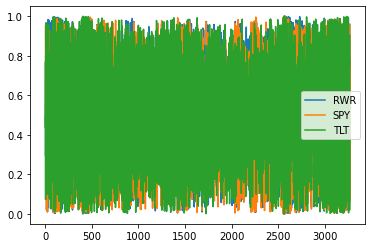

In [93]:
marginal_cdfs_df.plot()

<AxesSubplot:ylabel='Frequency'>

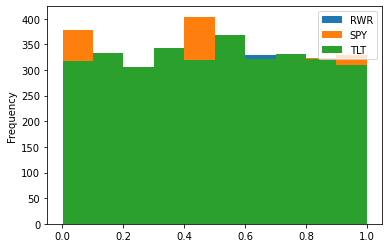

In [94]:
marginal_cdfs_df.plot(kind='hist')

<AxesSubplot:>

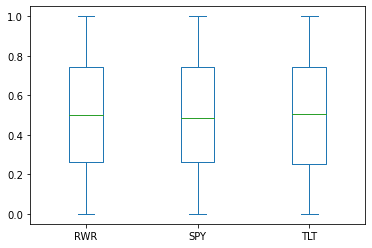

In [95]:
marginal_cdfs_df.plot(kind='box')

((array([2.11884361e-04, 5.14311304e-04, 8.19994100e-04, ...,
         9.99180006e-01, 9.99485689e-01, 9.99788116e-01]),
  array([4.24757057e-04, 6.07637585e-04, 1.03688986e-03, ...,
         9.98055475e-01, 9.98927115e-01, 9.99069932e-01])),
 (0.9976439074012176, -0.0031308079261214705, 0.9994596526072654))

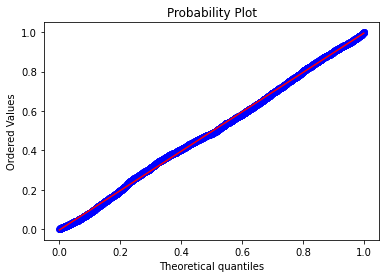

In [107]:
sc.probplot(marginal_cdfs_df['SPY'], dist='uniform', plot=plt)

In [97]:
import scipy.stats as sc

In [103]:
import matplotlib.pyplot as plt

((array([2.11884361e-04, 5.14311304e-04, 8.19994100e-04, ...,
         9.99180006e-01, 9.99485689e-01, 9.99788116e-01]),
  array([1.52858454e-04, 4.59290111e-04, 8.63235696e-04, ...,
         9.99235708e-01, 9.99541425e-01, 9.99847142e-01])),
 (0.9864851474148814, 0.006757426292558821, 0.999927153448212))

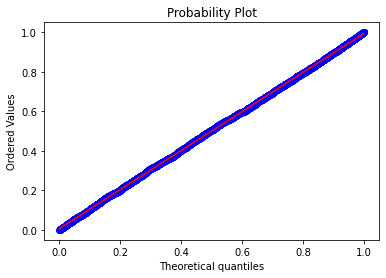

In [108]:
sc.probplot(marginal_cdfs_df['TLT'], dist='uniform', plot=plt)

((array([2.11884361e-04, 5.14311304e-04, 8.19994100e-04, ...,
         9.99180006e-01, 9.99485689e-01, 9.99788116e-01]),
  array([1.52858453e-04, 4.58575359e-04, 7.64292268e-04, ...,
         9.99151410e-01, 9.99449653e-01, 9.99844698e-01])),
 (0.9791139381906453, 0.010443030904676964, 0.9998086727694083))

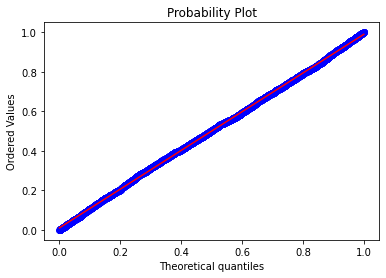

In [109]:
sc.probplot(marginal_cdfs_df['RWR'], dist='uniform', plot=plt)

In [113]:
copula.univariates[1].cdf(1)


0.9999982575796666

In [115]:
copula.univariates[1]

Univariate

In [116]:
from copulas.univariate import Univariate

In [117]:
univariate= Univariate()
univariate.fit(daily_returns_df['TLT'])

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in scalar divide
  a = (self.min - loc) / scale
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  b = (self.max - loc) / scale


In [118]:
parameters= univariate.to_dict()

In [119]:
parameters

{'dataset': [-0.000890173660634448,
  0.0064376668885347856,
  -0.013477094917659204,
  0.0016802929507116894,
  -0.0004470534507953377,
  -0.00550346233236719,
  0.016972560650796945,
  -0.011693183138037754,
  0.013904588722424683,
  0.006168057533588986,
  -0.00285920114681508,
  0.010078951748850673,
  0.004567682145474858,
  -0.0017374650595756067,
  -0.004575878901949159,
  0.0003274849479777347,
  -0.0005450827724812398,
  -0.0005464404734670368,
  0.00870332883359262,
  -0.009118040704650205,
  0.002847779759779438,
  -0.011663168216456563,
  0.015702323691735874,
  0.002177140611914207,
  0.00130368617935935,
  -0.01003906604540842,
  -0.009587388164942682,
  -0.005440408997125598,
  0.004111461798879934,
  0.0018820057449655328,
  -0.011463396020882114,
  -0.004037966538661335,
  0.005379399229974643,
  -0.004143922365817789,
  0.015482964011939077,
  0.0024291294299261974,
  0.0056072710577218235,
  0.005140799579372073,
  -0.00043809160871327026,
  -0.0013150753176521246,
 

In [120]:
univariate.fit(daily_returns_df['RWR'])

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  a = (self.min - loc) / scale


In [121]:
parameters= univariate.to_dict()

In [122]:
parameters

{'dataset': [-0.004480170814216003,
  0.0008156611961721506,
  -0.0006124200402208824,
  0.009142444488548018,
  -0.00934568564449913,
  0.005698396968507211,
  -0.01698916684602374,
  0.020838521071051393,
  -0.0020241067344974385,
  -0.00895369324032564,
  0.021436412375491716,
  -0.01167269208172139,
  -0.029374162933733152,
  -0.02405229249367322,
  0.0031979654758977085,
  -0.007477974773386281,
  0.00960445106528969,
  -0.010032905014119447,
  -0.006241759239724117,
  0.01945554982532717,
  0.014503527076270133,
  -0.016835111659319314,
  -0.037405848568837025,
  0.020498046885945115,
  -0.025357227635716423,
  -0.0017719662724856348,
  0.0008866367400250577,
  0.009263241313748505,
  0.009613535370054004,
  0.02935398502867076,
  0.010710734712640594,
  0.012662356560772088,
  -0.00020633305187424807,
  0.005760145130361901,
  -0.0069989165673086315,
  0.007819437649336085,
  0.0036825019482860585,
  -0.00040875865717540275,
  0.00955576065675479,
  0.0006073955599901617,
  -0.0

In [123]:
from copulas.univariate import GaussianUnivariate, GammaUnivariate

candidates = [BetaUnivariate, GaussianUnivariate, GammaUnivariate, TUnivariate, LaplaceUnivariate]

univariate = Univariate(candidates=candidates)
univariate.fit(daily_returns_df['RWR'])

univariate.to_dict()

NameError: name 'BetaUnivariate' is not defined

In [125]:
copula.covariance


,RWR,SPY,TLT
RWR,1.000000,0.690800,-0.141357
SPY,0.690800,1.000000,-0.363047
TLT,-0.141357,-0.363047,1.000000


In [133]:
(daily_returns_df).cov()

,RWR,SPY,TLT
RWR,0.000192,0.000117,-0.000024
SPY,0.000117,0.000124,-0.000040
TLT,-0.000024,-0.000040,0.000090


In [132]:
(daily_returns_df).corr()

,RWR,SPY,TLT
RWR,1.000000,0.755000,-0.184926
SPY,0.755000,1.000000,-0.374797
TLT,-0.184926,-0.374797,1.000000


<AxesSubplot:>

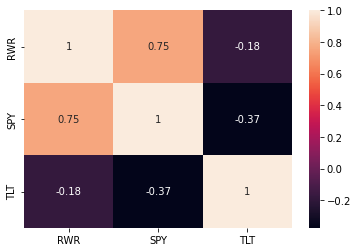

In [135]:
sb.heatmap((daily_returns_df).corr(), annot=True)

In [136]:
pd.DataFrame((daily_returns_df).corr())

,RWR,SPY,TLT
RWR,1.000000,0.755000,-0.184926
SPY,0.755000,1.000000,-0.374797
TLT,-0.184926,-0.374797,1.000000


C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:17: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:19: MatplotlibDeprecationWarning: 
The is_last_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_col() instead.
  if ax.is_last_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:21: MatplotlibDeprecationWarning: 
The is_first_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_row() instead.
  if ax.is_first_row():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:23: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and wil

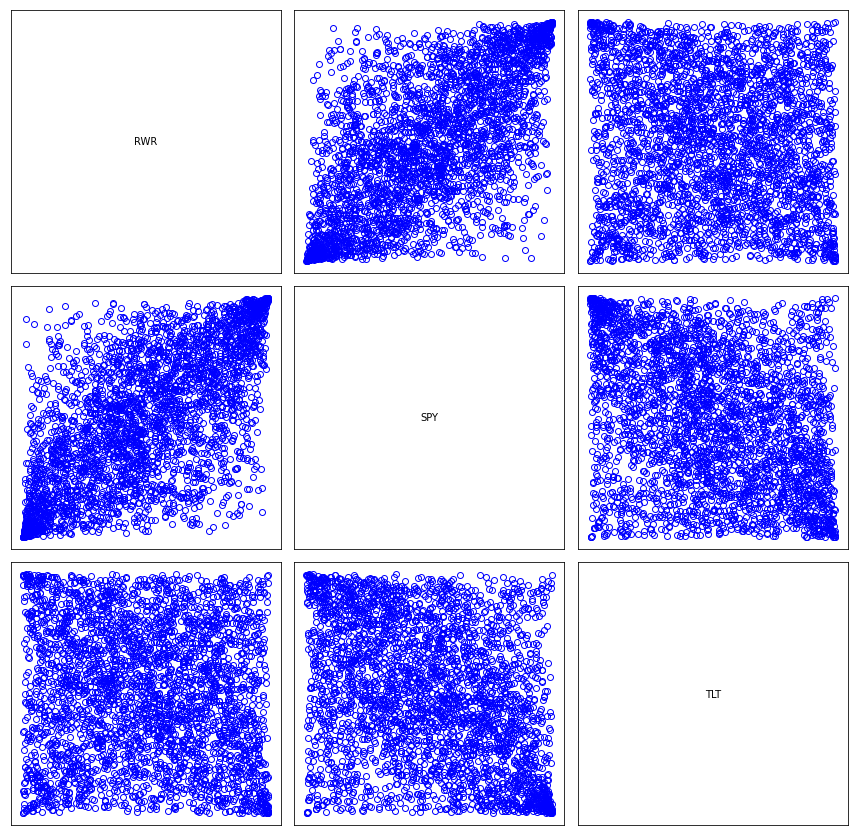

In [137]:
fig = scatterplot_matrix(marginal_cdfs_df, list(daily_returns_df.columns), linestyle='none', marker='o', color='blue', mfc='none')


C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:17: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:19: MatplotlibDeprecationWarning: 
The is_last_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_col() instead.
  if ax.is_last_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:21: MatplotlibDeprecationWarning: 
The is_first_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_row() instead.
  if ax.is_first_row():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9884/3260333680.py:23: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and wil

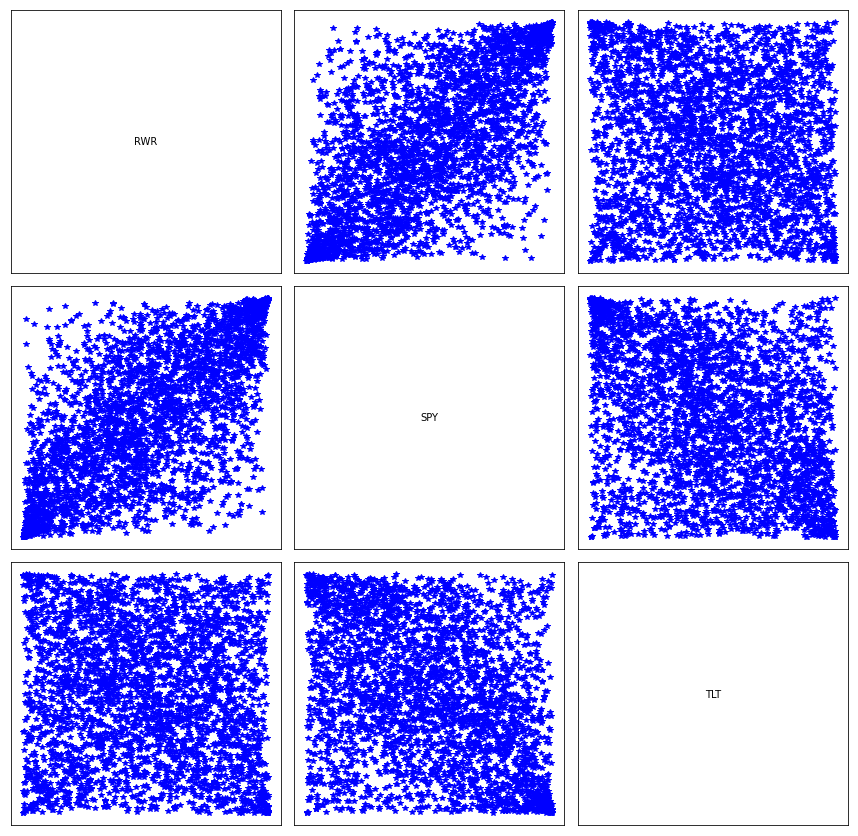

In [141]:
fig = scatterplot_matrix(marginal_cdfs_df, list(daily_returns_df.columns), linestyle='none', marker='*', color='blue')


<AxesSubplot:ylabel='RWR'>

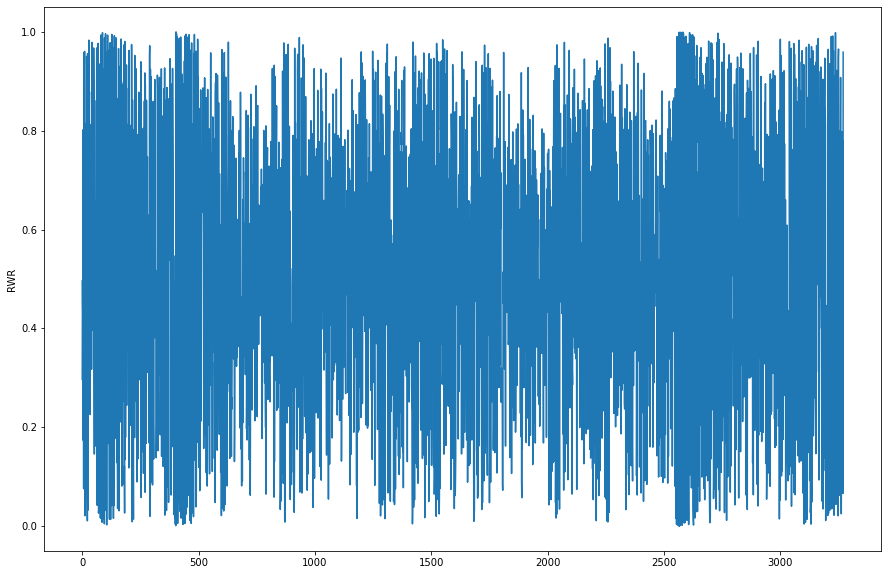

In [142]:
fig, ax = plt.subplots(figsize=(15,10))
sb.lineplot(data=marginal_cdfs_df.iloc[:,0], ax=ax)

In [143]:
marginal_cdfs_df.iloc[:,0]

0       0.296912
1       0.497407
2       0.438650
3       0.801746
4       0.173893
          ...   
3266    0.304013
3267    0.780250
3268    0.454272
3269    0.066220
3270    0.959037
Name: RWR, Length: 3271, dtype: float64

In [144]:
marginal_cdfs_df.iloc[:,1]

0       0.949665
1       0.597899
2       0.488303
3       0.678590
4       0.634056
          ...   
3266    0.054495
3267    0.745485
3268    0.253267
3269    0.069574
3270    0.955563
Name: SPY, Length: 3271, dtype: float64

In [145]:
marginal_cdfs_df.iloc[:,2]

0       0.437869
1       0.769537
2       0.072717
3       0.558799
4       0.457908
          ...   
3266    0.469573
3267    0.056747
3268    0.019482
3269    0.240218
3270    0.902478
Name: TLT, Length: 3271, dtype: float64

<AxesSubplot:xlabel='TLT', ylabel='Count'>

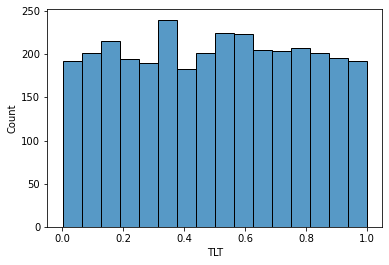

In [146]:
sb.histplot(marginal_cdfs_df.iloc[:,2])

<AxesSubplot:xlabel='SPY', ylabel='Count'>

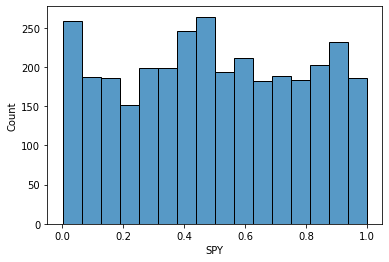

In [147]:
sb.histplot(marginal_cdfs_df.iloc[:,1])

<AxesSubplot:xlabel='RWR', ylabel='Count'>

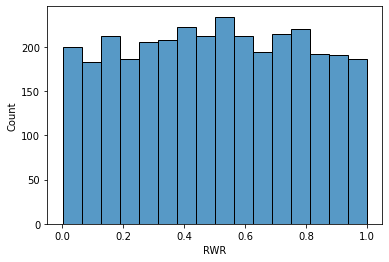

In [148]:
sb.histplot(marginal_cdfs_df.iloc[:,0])

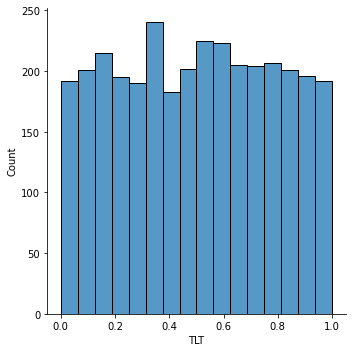

In [149]:
sb.displot(marginal_cdfs_df.iloc[:,2])

In [150]:
st.norm.ppf(marginal_cdfs_df.iloc[:,0])


array([-0.5333037 , -0.00649931, -0.15439251, ..., -0.11487651,
       -1.50454952,  1.73961471])

In [155]:
st.t.ppf(marginal_cdfs_df.iloc[:,0] , df=5)


array([-0.56922088, -0.00683037, -0.16246658, ..., -0.12081428,
       -1.79598789,  2.17208923])

In [156]:
st.laplace.ppf(marginal_cdfs_df.iloc[:,1] )

array([ 2.29590208,  0.21790402, -0.0236727 , ..., -0.68016398,
       -1.97222004,  2.42052951])

In [157]:
st.logistic.ppf(marginal_cdfs_df.iloc[:,2])

array([-0.24981433,  1.20569771, -2.54568746, ..., -3.91858766,
       -1.15148735,  2.22507107])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

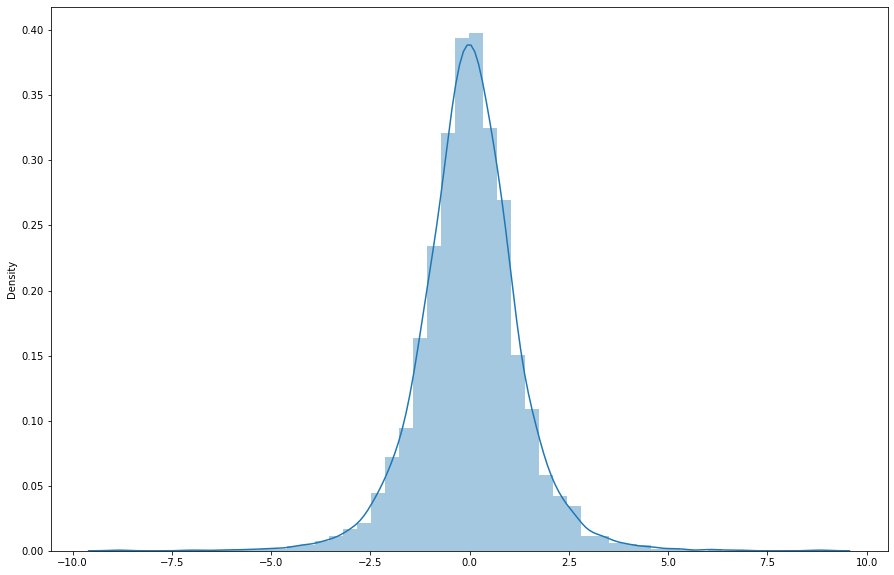

In [161]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(st.t.ppf(marginal_cdfs_df.iloc[:,0], df=5), ax=ax)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

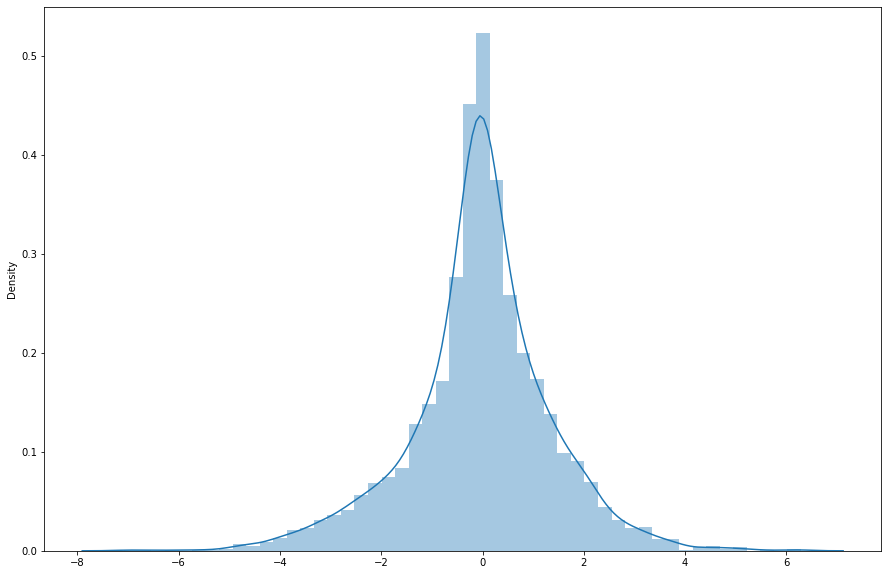

In [162]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(st.laplace.ppf(marginal_cdfs_df.iloc[:,1]), ax=ax)

In [170]:
from typing import Collection, Union
from copulae.copula import BaseCopula, EstimationMethod, Summary
from copulae.stats import random_uniform
from copulae.types import Array, Ties
from copulae.utility.annotations import *
from .summary import FitSummary

ImportError: attempted relative import with no known parent package

In [165]:
pip install summary

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tqdm in c:\users\jahan laptop\anaconda3\lib\site-packages (from nltk->summary) (4.62.3)
  Created wheel for summary: filename=summary-0.2.0-py3-none-any.whl size=18140 sha256=70e251d51300b816e870f738266609b06c0eb56547f9876a51fcd71df19657f1
  Stored in directory: c:\users\jahan laptop\appdata\local\pip\cache\wheels\dd\d2\45\826bd1eb26aa37057d7508726e82d5c1c60b080b2c71e6a68a
Successfully built summary



<AxesSubplot:>

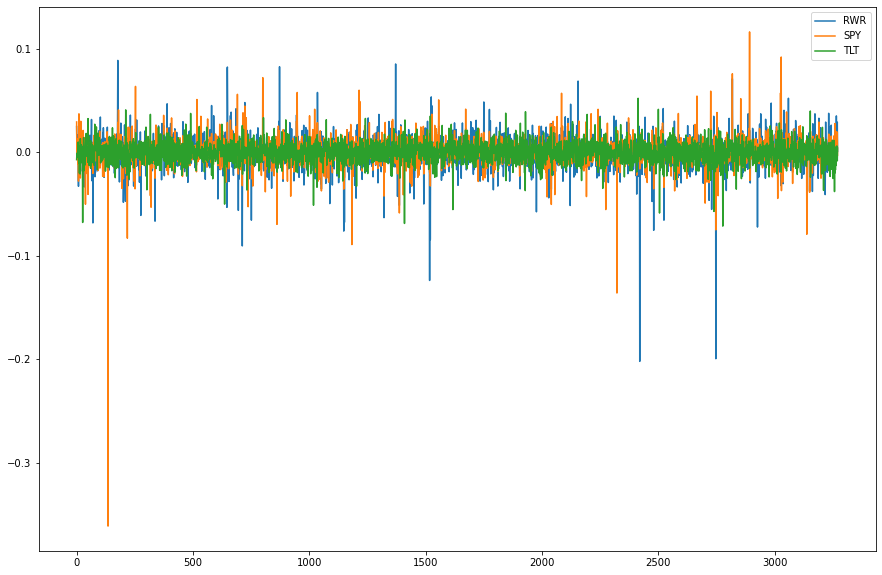

In [171]:
synthetic = copula.sample(len(marginal_cdfs_df))
synthetic.plot(figsize=(15,10))

In [174]:
len(marginal_cdfs_df)

3271

In [173]:
synthetic

,RWR,SPY,TLT
0,0.024826,0.029302,-0.007159
1,0.006739,-0.003930,-0.001901
2,-0.004743,-0.002580,-0.000819
3,0.008053,0.012935,-0.004675
4,0.016572,0.003230,-0.002583
...,...,...,...
3266,0.002212,0.009469,0.003463
3267,-0.004323,-0.001494,0.006157
3268,0.003877,-0.004857,0.003981
3269,0.029162,0.019445,-0.008303


In [175]:
marginal_cdfs_df

,RWR,SPY,TLT
0,0.296912,0.949665,0.437869
1,0.497407,0.597899,0.769537
2,0.438650,0.488303,0.072717
3,0.801746,0.678590,0.558799
4,0.173893,0.634056,0.457908
...,...,...,...
3266,0.304013,0.054495,0.469573
3267,0.780250,0.745485,0.056747
3268,0.454272,0.253267,0.019482
3269,0.066220,0.069574,0.240218


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


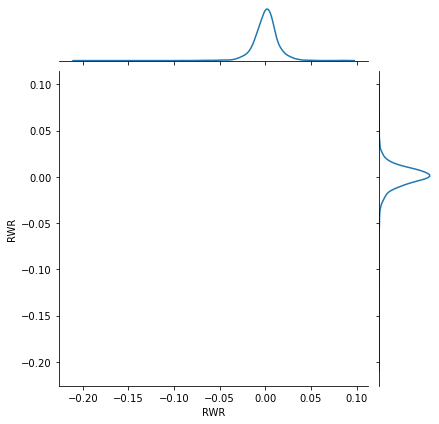

In [180]:
sb.jointplot(synthetic.iloc[:,0], daily_returns_df.iloc[:, 0], kind='kde')


In [177]:
synthetic.iloc[:,0]

0       0.024826
1       0.006739
2      -0.004743
3       0.008053
4       0.016572
          ...   
3266    0.002212
3267   -0.004323
3268    0.003877
3269    0.029162
3270    0.000899
Name: RWR, Length: 3271, dtype: float64

In [178]:
daily_returns_df.iloc[:, 0]

Date
2010-01-04   -0.004480
2010-01-05    0.000816
2010-01-06   -0.000612
2010-01-07    0.009142
2010-01-08   -0.009346
                ...   
2022-12-22   -0.004259
2022-12-23    0.008385
2022-12-27   -0.000229
2022-12-28   -0.018358
2022-12-29    0.021100
Name: RWR, Length: 3271, dtype: float64

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


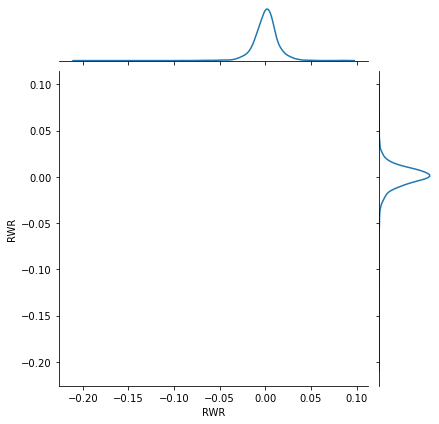

In [184]:
sb.jointplot(synthetic.iloc[:,0], daily_returns_df.iloc[:, 0], kind='kde')


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RWR', ylabel='Density'>

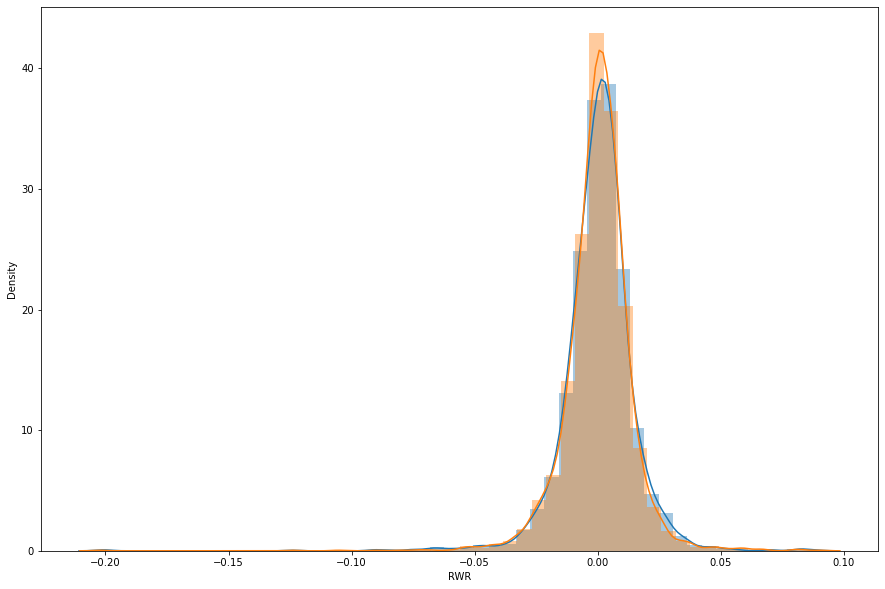

In [185]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(synthetic.iloc[:,0], ax=ax)
sns.distplot(daily_returns_df.iloc[:, 0], ax=ax)

In [196]:
from copulae import StudentCopula

copula_t = StudentCopula(dim=len(daily_returns_df.columns))
fit=copula_t.fit(data=daily_returns_df)

C:\Users\jahan laptop\anaconda3\lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: overflow encountered in power
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulae\stats\_multivariate_t.py:79: RuntimeWarning: divide by zero encountered in log
  return np.log(cls.pdf(x, mean, cov, df))


               RWR          SPY          TLT
count  3271.000000  3271.000000  3271.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [187]:
copula_t.summary()

1.000000,0.667441,-0.109006
0.667441,1.000000,-0.362794
-0.109006,-0.362794,1.000000


In [189]:
FitSummary()

NameError: name 'FitSummary' is not defined

In [195]:
import FitSummary

ModuleNotFoundError: No module named 'FitSummary'

In [194]:
print(fitsummary)

NameError: name 'fitsummary' is not defined

In [193]:
pip install FitSummary

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement FitSummary (from versions: none)
ERROR: No matching distribution found for FitSummary


In [198]:
fit.summary()

1.000000,0.667441,-0.109006
0.667441,1.000000,-0.362794
-0.109006,-0.362794,1.000000


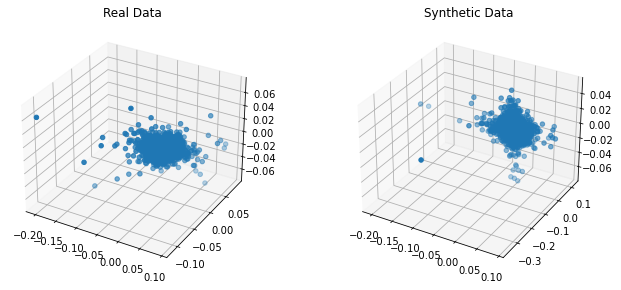

In [199]:
from copulas.visualization import compare_3d

compare_3d(daily_returns_df, synthetic)

In [200]:
from copulae.stats import multivariate_t as mvt, t
copula_t_synthetic = mvt.rvs(cov=copula_t.sigma, df=copula_t._df, size=len(daily_returns_df))
copula_t_synthetic = pd.DataFrame(copula_t_synthetic)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RWR', ylabel='Density'>

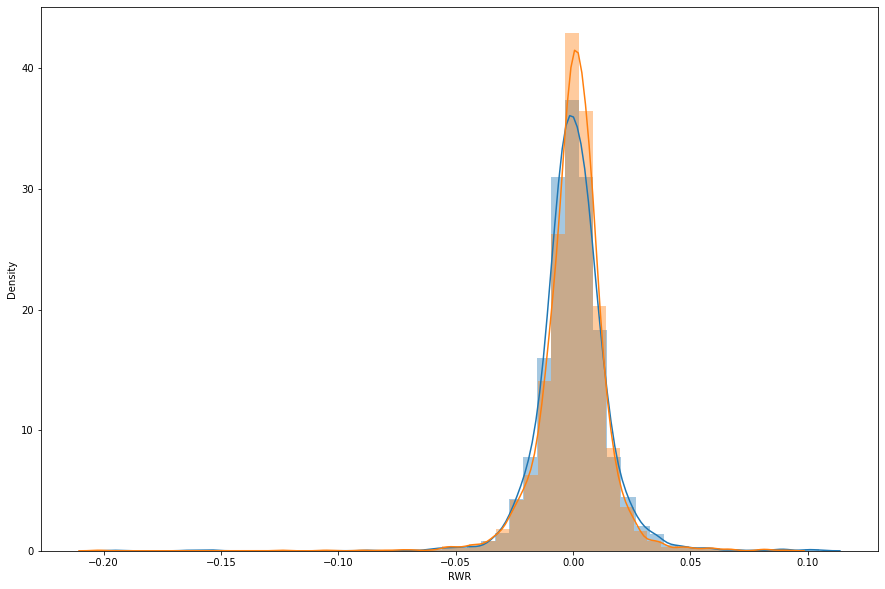

In [201]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(copula_t_synthetic.iloc[:,0] / 100, ax=ax)
sns.distplot(daily_returns_df.iloc[:,0], ax=ax)

In [202]:
copula_t_synthetic.columns = daily_returns_df.columns


In [203]:
weights = [1/len(synthetic.columns) for i in range(0, len(synthetic.columns))]
daily_portfolio_returns_df = daily_returns_df * weights
daily_portfolio_returns_df['portfolio_ret'] = daily_portfolio_returns_df.sum(axis=1)

In [204]:
daily_portfolio_returns_df

,RWR,SPY,TLT,portfolio_ret
Date,,,,
2010-01-04,-0.001493,0.005606,-0.000297,0.003816
2010-01-05,0.000272,0.000881,0.002146,0.003299
2010-01-06,-0.000204,0.000235,-0.004492,-0.004462
2010-01-07,0.003047,0.001404,0.000560,0.005012
2010-01-08,-0.003115,0.001107,-0.000149,-0.002157
...,...,...,...,...
2022-12-22,-0.001420,-0.004790,-0.000064,-0.006273
2022-12-23,0.002795,0.001912,-0.004923,-0.000216
2022-12-27,-0.000076,-0.001317,-0.006657,-0.008050


<AxesSubplot:xlabel='Date'>

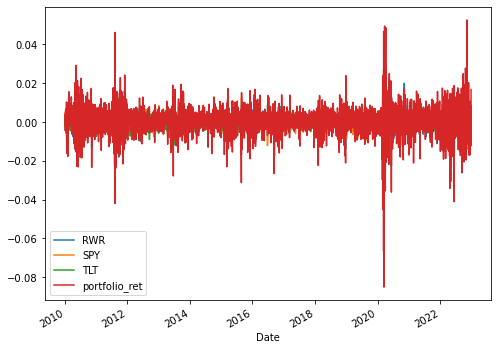

In [217]:
daily_portfolio_returns_df.plot(figsize=(8,6))

In [207]:
daily_portfolio_returns_df['portfolio_ret'] 

Date
2010-01-04    0.003816
2010-01-05    0.003299
2010-01-06   -0.004462
2010-01-07    0.005012
2010-01-08   -0.002157
                ...   
2022-12-22   -0.006273
2022-12-23   -0.000216
2022-12-27   -0.008050
2022-12-28   -0.012258
2022-12-29    0.016742
Name: portfolio_ret, Length: 3271, dtype: float64

<AxesSubplot:xlabel='Date'>

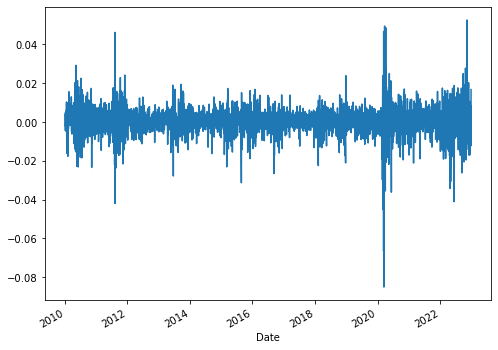

In [209]:
daily_portfolio_returns_df['portfolio_ret'].plot(figsize=(8,6))

In [210]:
daily_portfolio_returns_df['portfolio_ret'].describe()

count    3271.000000
mean        0.000301
std         0.007538
min        -0.085127
25%        -0.002982
50%         0.000666
75%         0.004043
max         0.052635
Name: portfolio_ret, dtype: float64

In [211]:
0.000301*100

0.0301

In [212]:
0.0301*252

7.5851999999999995

In [213]:
0.0301*26

0.7826

In [218]:
sc.skew(daily_portfolio_returns_df['portfolio_ret'])

-1.0896831881622753

In [219]:
sc.kurtosis(daily_portfolio_returns_df['portfolio_ret'])

15.531570317571415

In [220]:
portfolio_returns_df = synthetic * weights


In [221]:
portfolio_returns_df

,RWR,SPY,TLT
0,0.008275,0.009767,-0.002386
1,0.002246,-0.001310,-0.000634
2,-0.001581,-0.000860,-0.000273
3,0.002684,0.004312,-0.001558
4,0.005524,0.001077,-0.000861
...,...,...,...
3266,0.000737,0.003156,0.001154
3267,-0.001441,-0.000498,0.002052
3268,0.001292,-0.001619,0.001327
3269,0.009721,0.006482,-0.002768


In [222]:
portfolio_returns_df['portfolio_ret'] = portfolio_returns_df.sum(axis=1)


In [223]:
synthetic.quantile(0.1) * 100


RWR   -1.373750
SPY   -1.018935
TLT   -1.134159
Name: 0.1, dtype: float64

In [224]:
copula_portfolio_VaR = portfolio_returns_df.quantile(0.1)['portfolio_ret']
copula_portfolio_CVaR = np.mean(portfolio_returns_df['portfolio_ret'][portfolio_returns_df['portfolio_ret'] < - copula_portfolio_VaR])
print('Portfolio copula VaR', copula_portfolio_VaR * 100, 'CVaR', copula_portfolio_CVaR * 100)

Portfolio copula VaR -0.7842177479683295 CVaR -0.1254448034517628


In [225]:
covariance = daily_returns_df.cov()
mean_vec = daily_returns_df.mean(axis=0)
norm_synthetic = pd.DataFrame(st.multivariate_normal.rvs(mean_vec, covariance, size=100))
portfolio_norm_returns_df = norm_synthetic * weights
portfolio_norm_returns_df['portfolio_ret'] = portfolio_norm_returns_df.sum(axis=1)

norm_portfolio_VaR = portfolio_norm_returns_df.quantile(0.1)['portfolio_ret']
norm_portfolio_CVaR = np.mean(portfolio_norm_returns_df['portfolio_ret'][portfolio_norm_returns_df['portfolio_ret'] < - norm_portfolio_VaR])
print('Portfolio normal VaR', norm_portfolio_VaR * 100, 'CVaR', norm_portfolio_CVaR * 100)

Portfolio normal VaR -1.0092499981408558 CVaR -0.16968073981243184


In [226]:
portfolio_t_returns_df = copula_t_synthetic * weights
portfolio_t_returns_df['portfolio_ret'] = portfolio_t_returns_df.sum(axis=1)

In [227]:
portfolio_t_returns_df.head()


,RWR,SPY,TLT,portfolio_ret
0,-0.296782,-0.540004,0.285436,-0.551351
1,0.299196,0.021732,0.115115,0.436043
2,-0.563199,-0.342125,-0.097983,-1.003308
3,1.918596,1.452608,-0.487002,2.884202
4,0.435751,0.366534,0.379009,1.181294


<AxesSubplot:>

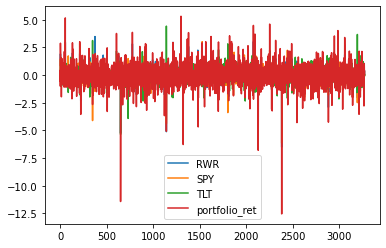

In [228]:
portfolio_t_returns_df.plot()

In [229]:
portfolio_t_returns_df.describe()

,RWR,SPY,TLT,portfolio_ret
count,3271.000000,3271.000000,3271.000000,3271.000000
mean,0.003805,0.000963,-0.003891,0.000878
std,0.507561,0.498536,0.486539,0.911158
min,-6.514229,-6.151798,-5.362180,-12.551000
25%,-0.237672,-0.244573,-0.255231,-0.450381
50%,-0.002274,0.005858,-0.004472,0.006070
75%,0.240630,0.248585,0.246088,0.438027
max,3.486540,3.023856,4.428646,5.321637


In [230]:
copula_t_portfolio_VaR = portfolio_t_returns_df.quantile(0.1)['portfolio_ret']
copula_t_portfolio_CVaR = np.mean(portfolio_t_returns_df['portfolio_ret'][portfolio_t_returns_df['portfolio_ret'] < - copula_t_portfolio_VaR])
print('Portfolio copula t VaR', copula_t_portfolio_VaR, 'CVaR', copula_t_portfolio_CVaR)

Portfolio copula t VaR -0.9056538851631739 CVaR -0.17830148267647844


Text(0.5, 1.0, 't-Student Copula Samples')

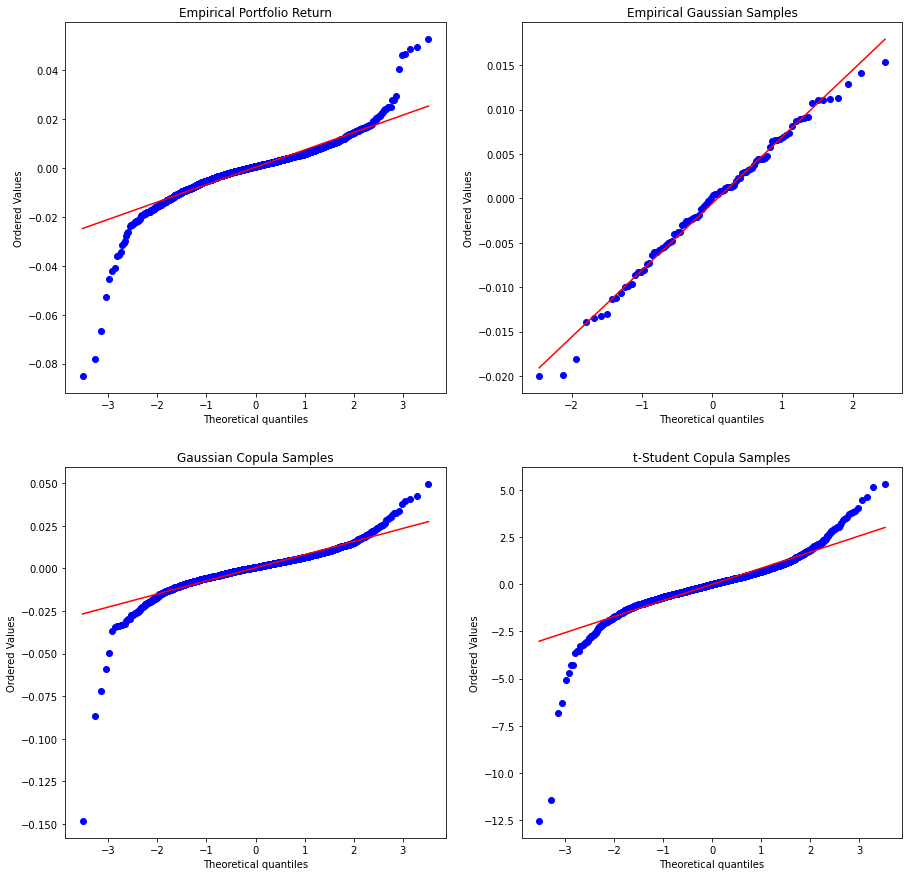

In [231]:
nsample = 100
fig, ax = plt.subplots(figsize=(15,15))

ax1 = plt.subplot(221)
x = daily_portfolio_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax1.set_title('Empirical Portfolio Return')

ax2 = plt.subplot(222)
x = portfolio_norm_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax2.set_title('Empirical Gaussian Samples')

ax3 = plt.subplot(223)
x = portfolio_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax3.set_title('Gaussian Copula Samples')

ax4 = plt.subplot(224)
x = portfolio_t_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax4.set_title('t-Student Copula Samples')

In [234]:
from copulae import GumbelCopula

In [236]:
gumbel= GumbelCopula.fit(data= daily_portfolio_returns_df['portfolio_ret'])


TypeError: fit() missing 1 required positional argument: 'self'

In [237]:
copula_gumbel = GumbelCopula(dim=len(daily_returns_df.columns))
copula_gumbel.fit(data=daily_returns_df)

C:\Users\jahan laptop\anaconda3\lib\site-packages\copulae\archimedean\gumbel.py:170: UserWarning: For the Gumbel copula, tau must be >= 0. Replacing negative values by 0.
  warnings.warn(warning_message)


               RWR          SPY          TLT
count  3271.000000  3271.000000  3271.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [239]:
copula_gumbel.summary()

Gumbel Copula Summary
================================================================================
Gumbel Copula with 3 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 1.0453883625601712

In [243]:
from copulae import GaussianCopula

In [244]:
copula_guss= GaussianCopula(dim=len(daily_returns_df.columns))
copula_guss.fit(data=daily_returns_df)

               RWR          SPY          TLT
count  3271.000000  3271.000000  3271.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [245]:
copula_guss.summary()

1.000000,0.691295,-0.139875
0.691295,1.000000,-0.363369
-0.139875,-0.363369,1.000000


In [246]:
from copulae import FrankCopula 

In [247]:
copula_frank= FrankCopula(dim=len(daily_returns_df.columns))
copula_frank.fit(data=daily_returns_df)

               RWR          SPY          TLT
count  3271.000000  3271.000000  3271.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [248]:
copula_frank.summary()

Frank Copula Summary
================================================================================
Frank Copula with 3 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 0.4257637842898089

In [251]:
from copulae import ClaytonCopula
copula_clayton= ClaytonCopula(dim=len(daily_returns_df.columns))
copula_clayton.fit(data=daily_returns_df)

               RWR          SPY          TLT
count  3271.000000  3271.000000  3271.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [252]:
copula_clayton.summary()

Clayton Copula Summary
================================================================================
Clayton Copula with 3 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 0.1707841713028232

In [253]:
cl=copula_clayton.fit(data=daily_returns_df)

               RWR          SPY          TLT
count  3271.000000  3271.000000  3271.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [254]:
cl.quantile(0.1)

AttributeError: 'ClaytonCopula' object has no attribute 'quantile'

In [257]:
#from copulae.stats import multivariate_t as mvt, t
copula_gumbel_synthetic = mvt.rvs(, size=len(daily_returns_df))
copula_gumbel_synthetic = pd.DataFrame(copula_gambel_synthetic)

AttributeError: 'GumbelCopula' object has no attribute 'theta'